Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


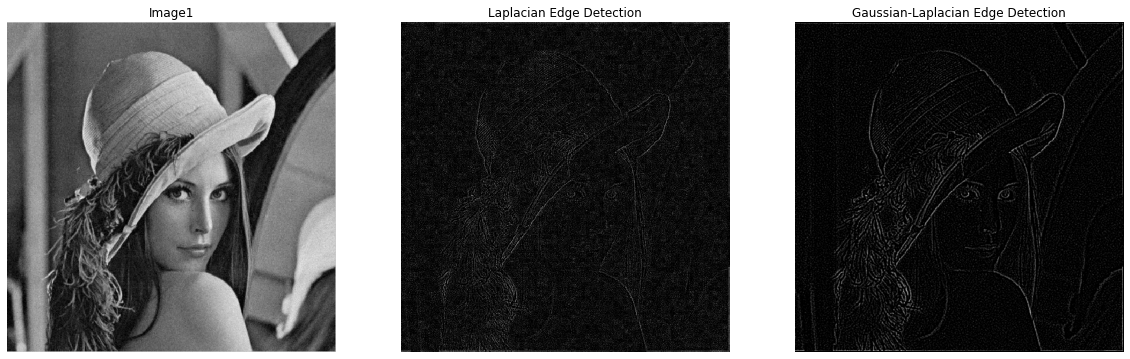

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
#라플라시안 가우시안필터
# 잡음에 매우 민감한 단점 극복을 위해 LOG검출기 개발
# 라플라시안 적용전에 가우시안 필터 적용하여 사전잡음 제거
drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')
#img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray_img,(3,3),1) 
# 라플라시안 에지는 잡음에 매우 예민하다. 
# 그래서 필터를 적용시켜 연산해야한다.(가우시안 필터)

# 라플라시안 에지 컨벌루션 연산하기
laplacian = cv2.Laplacian(blur,-1,1)

output_img = laplacian/laplacian.max() # 최대값으로 정규화 필요

laplacian1 = cv2.Laplacian(gray_img,-1,1)

output_img1 = laplacian1/laplacian1.max()

#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Laplacian Edge Detection")
plt.imshow(output_img1, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Gaussian-Laplacian Edge Detection")
plt.imshow(output_img, cmap='gray')
plt.axis("off")

plt.show()